## Homework #4. Exploratory Data Analysis
#### Author: `NIKITA ZAHORUI`
#### Total time spent on h/w (in minutes): 950

In [4]:
import pandas as pd

In [5]:
import os

In [6]:
import re

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
from sklearn import datasets

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
from nltk.util import ngrams

In [13]:
import nltk

In [14]:
from nltk.corpus import stopwords

In [15]:
from langdetect import detect, DetectorFactory, lang_detect_exception, LangDetectException

In [16]:
from transformers import pipeline

In [17]:
import emoji

In [18]:
import string

In [19]:
from collections import Counter

In [20]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

In [21]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, dtype={'to_id': str})
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

In [22]:
df.head(10)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,306193,2024-04-16 11:01:25+00:00,PeerUser(user_id=857650813),347624504,NaN,дякую,text,NaN,347624504
1,306192,2024-04-16 11:01:16+00:00,PeerUser(user_id=857650813),347624504,NaN,ага,text,NaN,347624504
2,306191,2024-04-16 11:01:07+00:00,NaN,857650813,NaN,а формула то моя здогадка скоріше,text,NaN,347624504
3,306190,2024-04-16 11:00:56+00:00,NaN,857650813,NaN,медвідь казав шо автмоат на основі середнього ...,text,NaN,347624504
4,306189,2024-04-16 11:00:40+00:00,NaN,857650813,NaN,дякую сорі ахахаха,text,NaN,347624504
5,306188,2024-04-16 11:00:27+00:00,PeerUser(user_id=857650813),347624504,NaN,.,text,NaN,347624504
6,977,2019-12-02 07:31:41+00:00,NaN,857650813,NaN,NaN,text,NaN,882903709
7,363053,2024-09-02 02:41:30+00:00,PeerUser(user_id=482979767),PeerChat(chat_id=834002429),NaN,"І якщо не піти, то нічого не станеться, але це...",text,NaN,-834002429
8,363052,2024-09-02 02:40:56+00:00,PeerUser(user_id=654454255),PeerChat(chat_id=834002429),NaN,Потім спробуй відпрацювати ще,text,NaN,-834002429
9,363051,2024-09-02 02:40:52+00:00,PeerUser(user_id=482979767),PeerChat(chat_id=834002429),NaN,"Та нуу, у мене сьогодні перша пара",text,NaN,-834002429


In [23]:
df.shape

(620495, 9)

In [24]:
min(df["date"]),max(df["date"])

('2019-08-18 08:19:39+00:00', '2024-10-22 15:45:27+00:00')

In [25]:
df.groupby(["type"])["type"].count()

type
photo      119230
sticker      8568
text       472277
video       13311
voice        7109
Name: type, dtype: int64

In [26]:
df.groupby(["type"])["duration"].sum()

type
photo           0.000000
sticker         0.000000
text            0.000000
video      440387.329266
voice      194937.000000
Name: duration, dtype: float64

In [27]:
telegram_id = '857650813'

# Tasks

### 1. Calculate the longest sleep at night in 2024
### 2. Proportion of "funny" messages to all messages ('ahahaah' or similar messages)
### 2.1 Show "the funniest" chats (where the number of 'ahahaah' or similar messages is the biggest)
### 2.2 Show the chats where I received the biggest amount of such messages 
### 2.3 Show the chats where I sent the biggest amount of such messages
### 3. Show message activity throughout the week
### 4. Show average response time by hour
### 5. Display the most popular emojis in all messages
### 6. Show distribution of detected languages in messages
### 7. Sentiment distribution of messages
### 8. Show average message length by day of the week and hour
### 9. Track from which device the user sends messages (if the user has a large number of messages written in capital letters, then most likely they are from a mobile phone)
### 10. Determine the number of messages that end with a dot
### 11. Show the average number of messages sent in a sequence to each user
### 12. Show the distribution of one-word messages to all 
### 13. Show average length of voice messages by hour of the day
### 14. Show top 10 bigrams
### 15. Show the number of messages with @ tags
### 16. Show the most common channels from which messages are forwarded
### 17. Show messages that have questions 
### 18. Show the correlation between message length and word count for each message
### 19. Show messages distribution by weekend / weekday
### 20. Show the correlation between number count and special symbol count ($ or ₴ or %)

# Tasks

#### 1. Calculate the amount of sleep at night

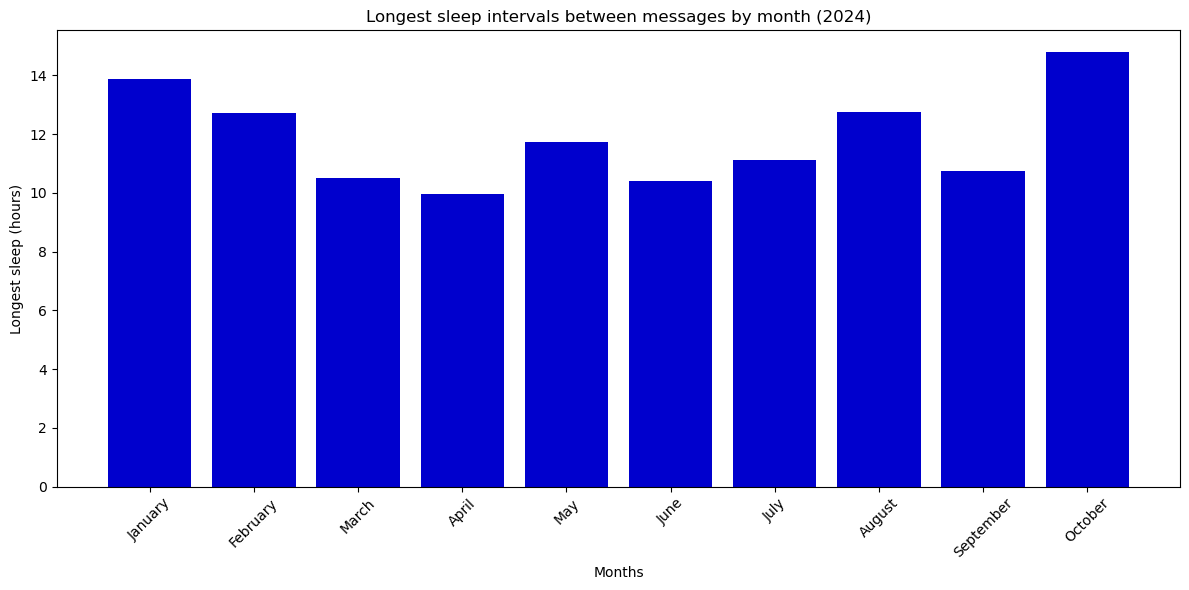

In [32]:
df_copy = df.copy()

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

filtered_messages = df_copy[df_copy['from_id'] == telegram_id]

filtered_messages = filtered_messages[filtered_messages['date'].dt.year == 2024]

filtered_messages = filtered_messages.sort_values(by='date')

longest_intervals = []

start_date = filtered_messages['date'].min()

while start_date < filtered_messages['date'].max():
    end_date = start_date + pd.Timedelta(days=2)
    two_day_messages = filtered_messages[(filtered_messages['date'] >= start_date) & 
                                        (filtered_messages['date'] < end_date)]
    
    if len(two_day_messages) > 1:  
        time_diffs = two_day_messages['date'].diff()  
        if not time_diffs.empty:
            longest_interval = time_diffs.max()
            longest_intervals.append({'start_date': start_date, 'end_date': end_date, 'longest_interval': longest_interval})
    
    start_date += pd.Timedelta(days=2)

longest_intervals_df = pd.DataFrame(longest_intervals)

longest_intervals_df['longest_interval'] = longest_intervals_df['longest_interval'].dt.total_seconds() / 3600 
    
longest_intervals_df['month'] = longest_intervals_df['start_date'].dt.month_name()

plt.figure(figsize=(12, 6))
plt.bar(longest_intervals_df['month'], longest_intervals_df['longest_interval'], color='#0000CD')
        
plt.xlabel('Months')
plt.ylabel('Longest sleep (hours)')
plt.title('Longest sleep intervals between messages by month (2024)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2. Proportion of "funny" messages to all messages ('ahahaah' or similar messages)

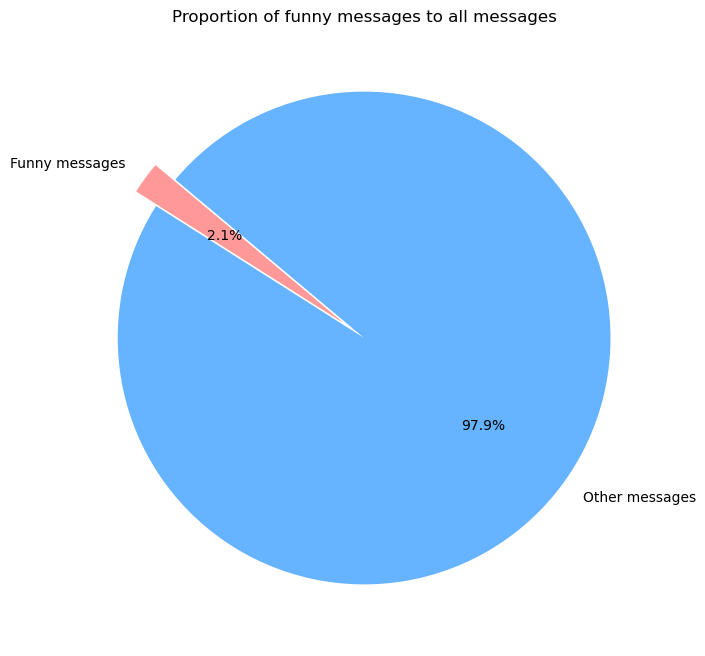

In [34]:
df_copy = df.copy()

total_messages_count = len(df_copy)

funny_messages = df_copy[df_copy['message'].str.match(r'^(?!([ахвпah])\1+$)[ахвпah]{2,}$', case=False, na=False)]

funny_messages_count = len(funny_messages)

labels = ['Funny messages', 'Other messages']
sizes = [
    (funny_messages_count / total_messages_count) * 100,  
    ((total_messages_count - funny_messages_count) / total_messages_count) * 100 
]
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'], explode=explode)
plt.title('Proportion of funny messages to all messages')
plt.show()

#### 2.1 Show "the funniest" chats (where the number of 'ahahaah' or similar messages is the biggest)

In [36]:
df_copy = df.copy()

funny_messages = df_copy[df_copy['message'].str.match(r'^(?!([ахвпah])\1+$)[ахвпah]{2,}$', case=False, na=False)]

funny_counts = funny_messages.groupby('dialog_id').size().reset_index(name='funny_count')

funniest_chats = funny_counts.sort_values(by='funny_count', ascending=False).reset_index(drop=True)

funniest_chats.index += 1

print(funniest_chats.head(10))

        dialog_id  funny_count
1       797970730         4023
2       829711671          912
3       682169677          877
4      1010530029          843
5  -1001806752179          837
6  -1001142723513          680
7       482979767          599
8       695234977          569
9  -1001205907880          542
10      654454255          400


#### 2.2 Show the chats where I received the biggest amount of such messages 

In [38]:
df_copy = df.copy()

if df_copy['to_id'].str.isdigit().any():
    numeric_to_id = df_copy[df_copy['to_id'].str.isdigit()]
else:
    df_copy['to_id'] = df_copy['to_id'].str.split('=').str[1]
    numeric_to_id = df_copy[df_copy['to_id'].str.isdigit()]

received_messages = numeric_to_id[numeric_to_id['to_id'] == telegram_id]

funny_messages_received = received_messages[received_messages['message'].str.match(r'^(?!([ахвпah])\1+$)[ахвпah]{2,}$', case=False, na=False)]

funny_counts_received = funny_messages_received.groupby('dialog_id').size().reset_index(name='funny_count')

funniest_chats_received = funny_counts_received.sort_values(by='funny_count', ascending=False).reset_index(drop=True)

funniest_chats_received.index += 1

print(funniest_chats_received.head(10))

     dialog_id  funny_count
1    797970730         1720
2    829711671          477
3   1010530029          356
4    695234977          309
5    482979767          236
6    654454255          187
7    322501499          161
8    682169677          128
9    633836915           74
10   543829731           63


#### 2.3 Show the chats where I sent the biggest amount of such messages

In [40]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

sent_messages = df_copy[df_copy['from_id'] == telegram_id]

funny_messages_sent = sent_messages[sent_messages['message'].str.match(r'^(?!([ахвпah])\1+$)[ахвпah]{2,}$', case=False, na=False)]

funny_counts_sent = funny_messages_sent.groupby('dialog_id').size().reset_index(name='funny_count')

funniest_chats_sent = funny_counts_sent.sort_values(by='funny_count', ascending=False).reset_index(drop=True)

funniest_chats_sent.index += 1

print(funniest_chats_sent.head(10))

     dialog_id  funny_count
1    797970730         2303
2    682169677          749
3   1010530029          487
4    829711671          435
5    482979767          363
6    695234977          260
7    543829731          215
8    654454255          213
9    948806469          103
10   814737204           98


#### 3. Show message activity throughout the week

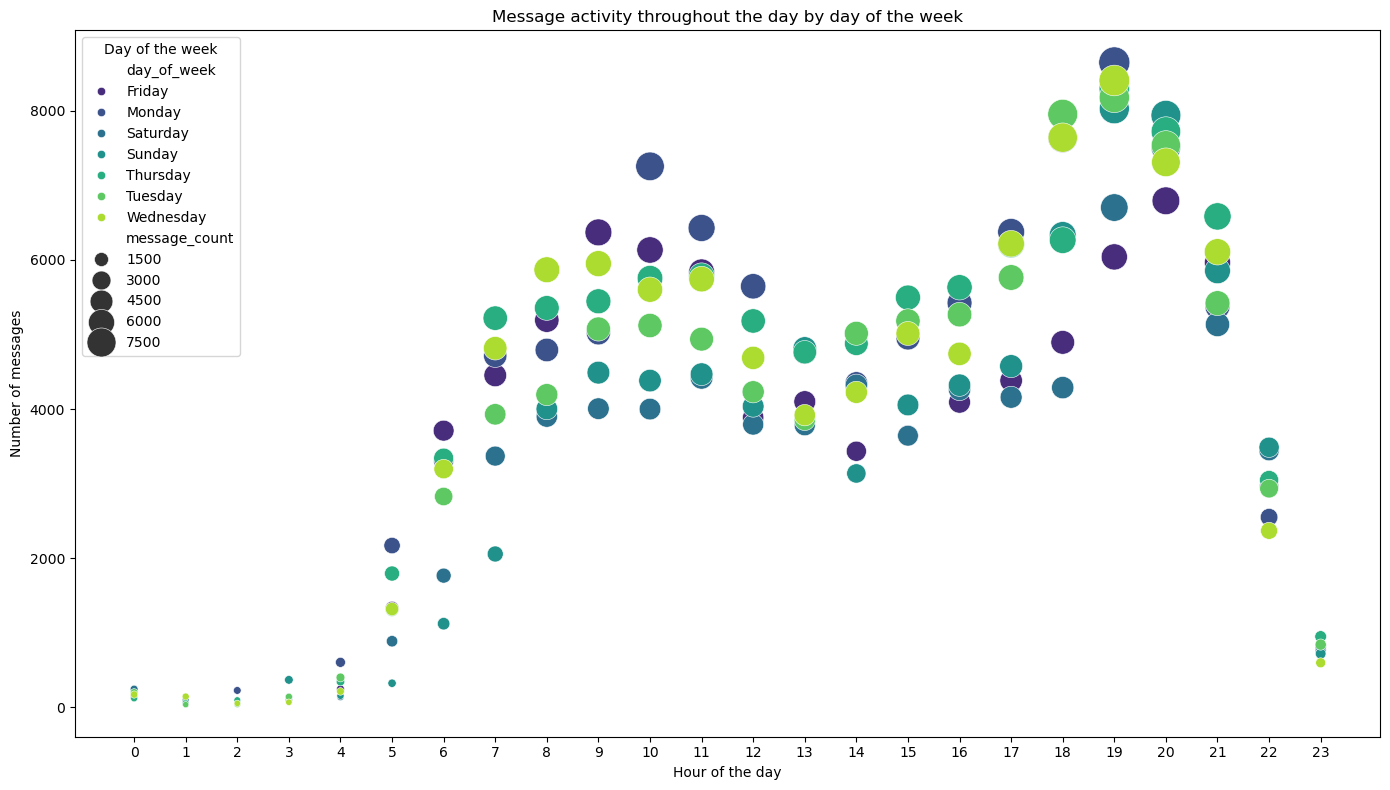

In [157]:
df_copy = df.copy()

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy['hour'] = df_copy['date'].dt.hour

df_copy['day_of_week'] = df_copy['date'].dt.day_name()

hourly_activity = df_copy.groupby(['hour', 'day_of_week']).size().reset_index(name='message_count')

plt.figure(figsize=(14, 8))

sns.scatterplot(x='hour', y='message_count', hue='day_of_week', size='message_count', sizes=(20, 500), data=hourly_activity, palette='viridis')

plt.xlabel('Hour of the day')
plt.ylabel('Number of messages')
plt.title('Message activity throughout the day by day of the week')
plt.xticks(range(24))
plt.legend(title='Day of the week')
plt.tight_layout()
plt.show()

#### 4. Show average response time by hour

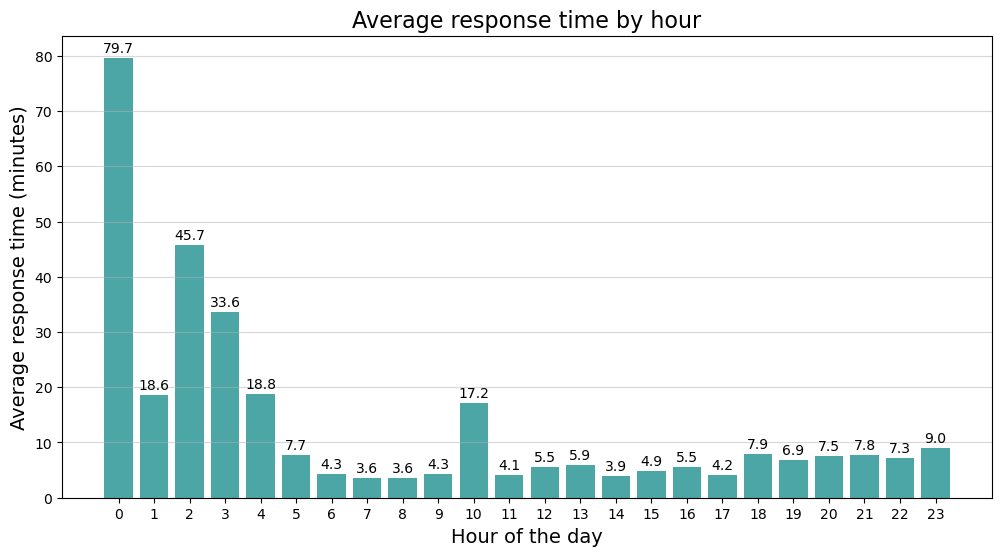

In [44]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy = df_copy.sort_values(by='date')

response_times = []

for i in range(len(df_copy) - 1):
    if df_copy['from_id'].iloc[i] == telegram_id and df_copy['from_id'].iloc[i + 1] != telegram_id:
        time_taken = (df_copy['date'].iloc[i + 1] - df_copy['date'].iloc[i]).total_seconds() / 60
        response_times.append((df_copy['date'].iloc[i].hour, time_taken))

response_df = pd.DataFrame(response_times, columns=['hour', 'response_time'])

average_response_time = response_df.groupby('hour')['response_time'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_response_time['hour'], average_response_time['response_time'], 
        color='teal', alpha=0.7)
plt.title('Average response time by hour', fontsize=16)
plt.xlabel('Hour of the day', fontsize=14)
plt.ylabel('Average response time (minutes)', fontsize=14)
plt.xticks(range(24))
plt.grid(axis='y', alpha= 0.5)
for i, value in enumerate(average_response_time['response_time']):
    plt.text(i, value + 1 , f'{value:.1f}', ha='center', fontsize=10)
plt.show()

#### 5. Display the most popular emojis in all messages

In [46]:
df_copy = df.copy()

def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]

all_emojis = []

for message in df_copy['message'].fillna(''):
    emojis = extract_emojis(message)
    all_emojis.extend(emojis)

emoji_counts = Counter(all_emojis)

most_common_emojis = emoji_counts.most_common(10)

print("The most popular emojis in all messages:")
for emoji_char, count in most_common_emojis:
    print(f"{emoji_char}: {count}")

The most popular emojis in all messages:
😔: 3275
✅: 3144
😭: 3022
💋: 2501
🥺: 1144
🥰: 1112
🏻: 1103
❗: 1025
❤: 907
🙏: 835


#### 6. Show distribution of detected languages in messages

In [48]:
df_copy = df.copy()

DetectorFactory.seed = 0

df_copy['message'] = df_copy['message'].fillna('')

messages = df_copy[df_copy['message'].str.strip() != '']['message']

detected_languages = []

for message in messages:
    try:
        language = detect(message)
        detected_languages.append(language)
    except LangDetectException:
        detected_languages.append('unknown')

languages_df = pd.DataFrame({
    'message': messages,
    'detected_language': detected_languages
})

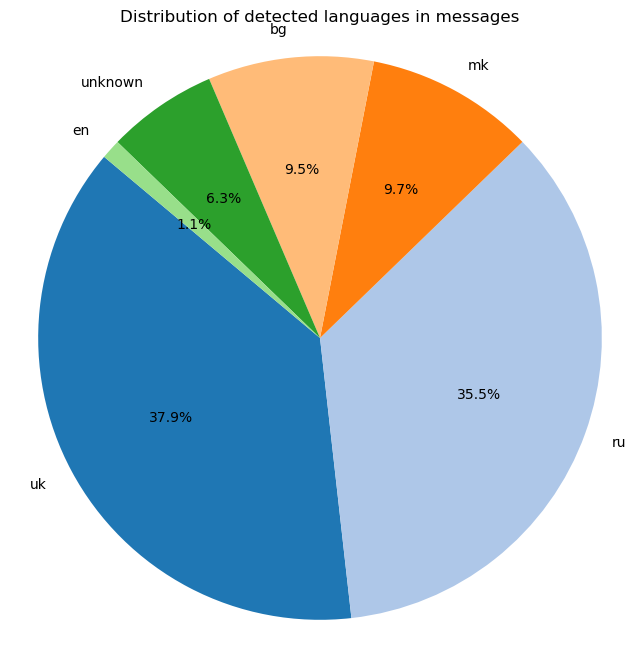

In [49]:
languages_df = pd.read_csv('detected_languages.csv')

language_counts = languages_df['detected_language'].value_counts()

threshold = 0.01 * len(languages_df)

other_count = language_counts[language_counts < threshold].sum()

language_counts = language_counts[language_counts >= threshold]

language_counts['unknown'] += other_count

plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of detected languages in messages')
plt.axis('equal')
plt.show()

# unfortunately, langdetect does not work well with Slavic languages, so after analyzing bg and mk, it is mostly uk and ru
# "unknown" are messages that could not be identified or was identified very poorly

#### 7. Sentiment distribution of messages

In [51]:
df_clone = df.copy()

text_messages = df_clone['message'].head(10000).astype(str).tolist()

sentiment_analyzer = pipeline("sentiment-analysis")

def split_long_message(message, max_length=512):
    tokens = message.split()
    current_chunk = []
    current_length = 0

    for token in tokens:
        token_length = len(token) + 1
        if current_length + token_length > max_length:
            yield ' '.join(current_chunk)
            current_chunk = [token]
            current_length = token_length
        else:
            current_chunk.append(token)
            current_length += token_length

    if current_chunk:
        yield ' '.join(current_chunk)

shortened_messages = []

for message in text_messages:
    shortened_messages.extend(split_long_message(message))

sentiment_analysis_results = []

batch_size = 10 

for i in range(0, len(shortened_messages), batch_size):
    batch = shortened_messages[i:i + batch_size]
    sentiment_analysis_results.extend(sentiment_analyzer(batch))

results_df = pd.DataFrame(sentiment_analysis_results)

results_df['message'] = shortened_messages

results_df['sentiment'] = results_df['label'].apply(lambda x: 'Positive' if x == 'POSITIVE' else ('Negative' if x == 'NEGATIVE' else 'Neutral'))

results_df.to_csv('sentiment_analysis_results.csv', index=False)

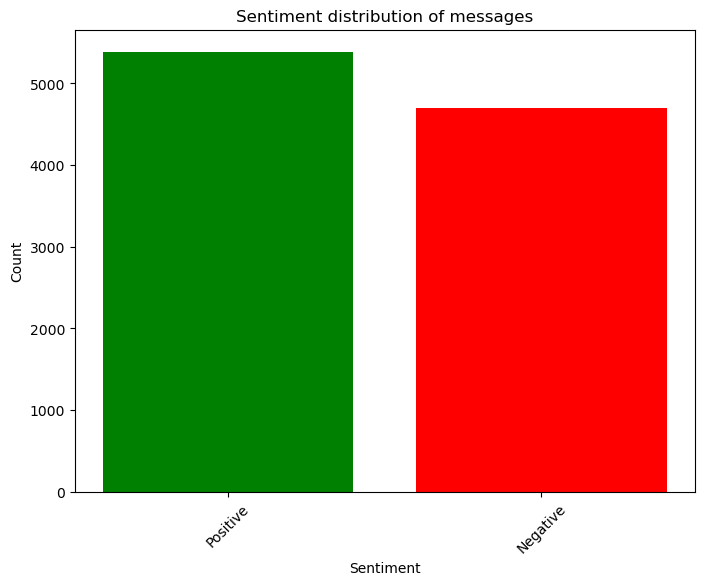

In [52]:
sentiment_df = pd.read_csv('sentiment_analysis_results.csv')

sentiment_distribution = sentiment_df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values, color=['green', 'red', 'grey'])
plt.title('Sentiment distribution of messages')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# I showed only for 10000 messages because it is a very technically long process

#### 8. Show average message length by day of the week and hour

<Figure size 1400x800 with 0 Axes>

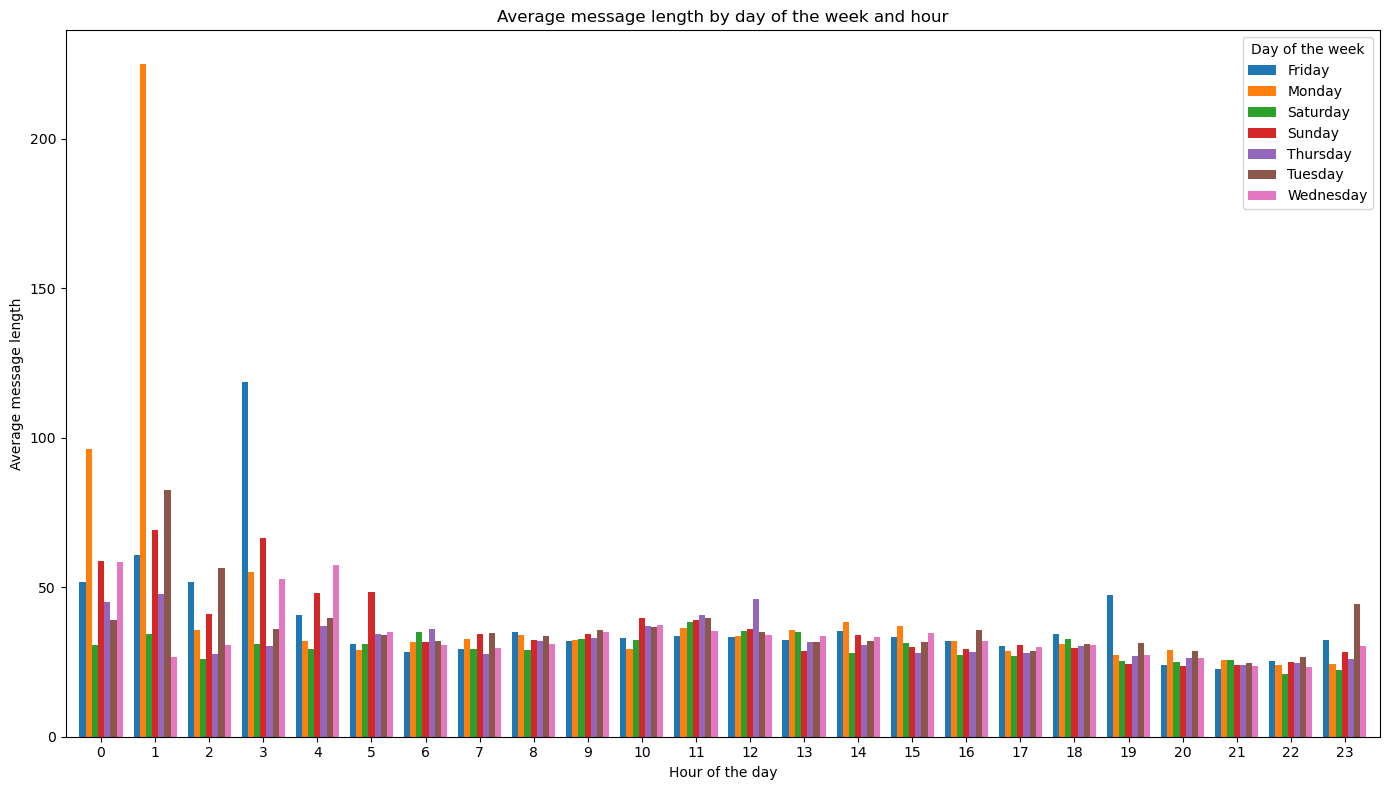

In [54]:
df_copy = df.copy()

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy['hour'] = df_copy['date'].dt.hour

df_copy['day_of_week'] = df_copy['date'].dt.day_name()

df_copy['message_length'] = df_copy['message'].str.len()

average_length = df_copy.groupby(['day_of_week', 'hour'])['message_length'].mean().reset_index()

plt.figure(figsize=(14, 8))
pivot_table = average_length.pivot(index='hour', columns='day_of_week', values='message_length')
pivot_table.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Average message length by day of the week and hour')
plt.xlabel('Hour of the day')
plt.ylabel('Average message length')
plt.xticks(rotation=0)
plt.legend(title='Day of the week')
plt.tight_layout()
plt.show()

# I think that the length of the messages at the first hours of the day is related to the fact that most of these messages are birthday greetings, etc.

#### 9. Track from which device the user sends messages (if the user has a large number of messages written in capital letters, then most likely they are from a mobile phone)

In [56]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

df_copy['first_letter_upper'] = df_copy['message'].str[0].str.isupper()

user_message_count = df_copy.groupby('from_id').size().reset_index(name='total_messages')

user_uppercase_count = df_copy.groupby('from_id')['first_letter_upper'].sum().reset_index(name='uppercase_messages')

user_message_stats = pd.merge(user_message_count, user_uppercase_count, on='from_id')

user_message_stats['uppercase_percentage'] = (user_message_stats['uppercase_messages'] / user_message_stats['total_messages']) * 100

top_10_users = user_message_stats[user_message_stats['uppercase_percentage'] < 100].sort_values(by='uppercase_percentage', ascending=False).head(10)

top_10_users.reset_index(drop=True, inplace=True)

top_10_users.index += 1

print(top_10_users[['from_id', 'uppercase_percentage']])

# I removed people whose percentage is 100, because there are channels in which the requirements for each message are very strict

       from_id uppercase_percentage
1   6133328428            99.452555
2   6650408517                 96.0
3   1827311697            95.652174
4    650916413            95.652174
5    699800064            95.238095
6    830456292            94.736842
7    455550602            94.382022
8    360128103            93.939394
9   5779461248            93.333333
10   409222794            92.857143


#### 10. Determine the number of messages that end with a dot

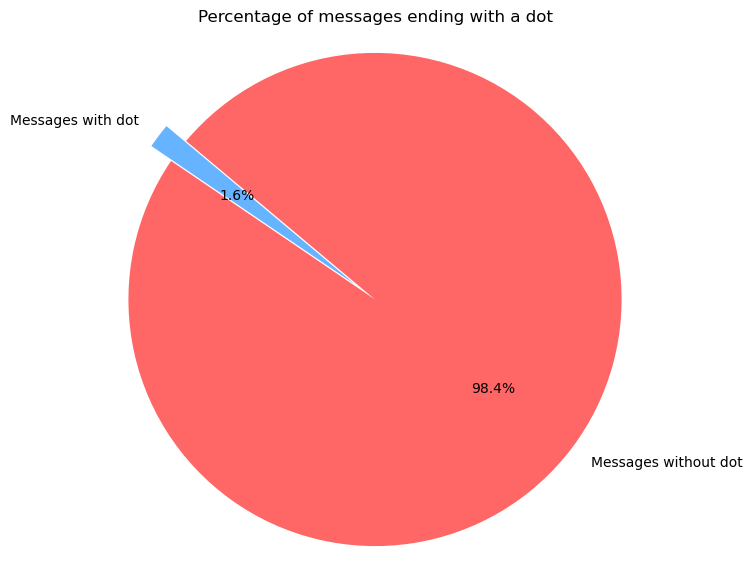

In [58]:
df_copy = df.copy()

df_copy['ends_with_dot'] = df_copy['message'].str.endswith('.')

total_messages = len(df_copy)
messages_with_dot = df_copy['ends_with_dot'].sum()

labels = ['Messages with dot', 'Messages without dot']
sizes = [messages_with_dot, total_messages - messages_with_dot]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Percentage of messages ending with a dot')
plt.axis('equal')
plt.show()

#### 11. Show the average number of messages sent in a sequence to each user

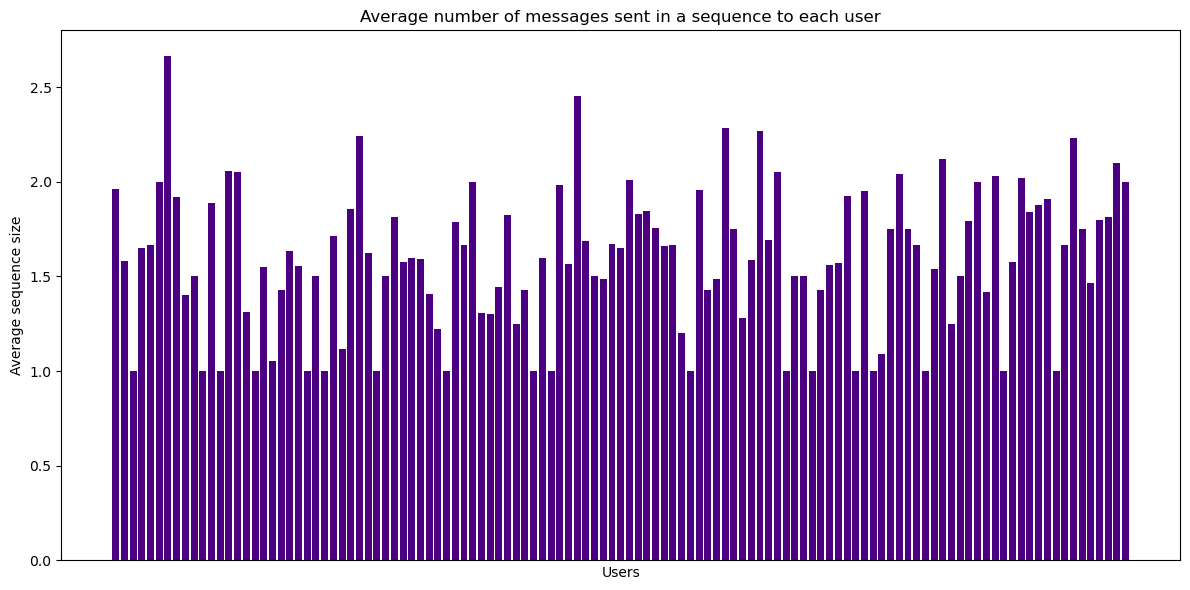

In [60]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

if df_copy['to_id'].str.isdigit().any():
    df_copy = df_copy[df_copy['to_id'].str.isdigit()]
else:
    df_copy['to_id'] = df_copy['to_id'].str.split('=').str[1]
    df_copy = df_copy[df_copy['to_id'].str.isdigit()]

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy = df_copy.sort_values('date')

df_copy = df_copy[df_copy['type'] == 'text']

df_copy['sequence'] = (df_copy['from_id'] != df_copy['from_id'].shift()).cumsum()

sequence_counts = df_copy.groupby(['sequence', 'to_id']).size().reset_index(name='message_count')

average_message_sequence = sequence_counts.groupby('to_id')['message_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_message_sequence['to_id'].astype(str), average_message_sequence['message_count'], color='indigo')
plt.xlabel('Users')
plt.ylabel('Average sequence size')
plt.title('Average number of messages sent in a sequence to each user')
plt.xticks([])
plt.tight_layout()
plt.show()

#### 12. Show the distribution of one-word messages to all 

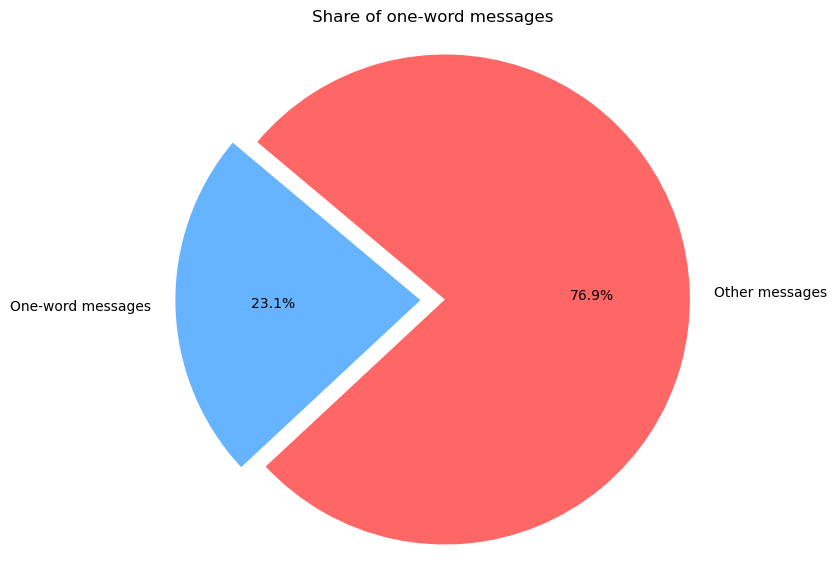

In [125]:
df_copy = df.copy()

df_copy['word_count'] = df_copy['message'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

one_word_messages = df_copy[df_copy['word_count'] == 1]

one_word_share = len(one_word_messages) / len(df_copy)

labels = ['One-word messages', 'Other messages']
sizes = [one_word_share, 1 - one_word_share]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of one-word messages')
plt.axis('equal')
plt.show()

#### 13. Show average length of voice messages by hour of the day

/var/folders/sx/r3ltm00s6_77ygm7hw9d566c0000gn/T/ipykernel_25818/921667433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_messages['hour'] = voice_messages['date'].dt.hour


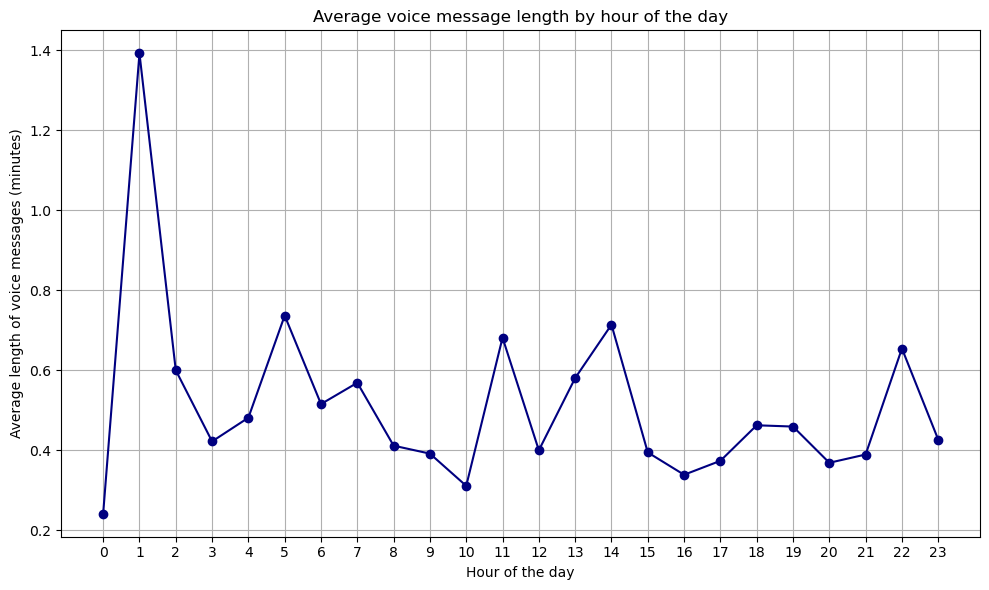

In [62]:
df_copy = df.copy()

df_copy['date'] = pd.to_datetime(df_copy['date'])

voice_messages = df_copy[df_copy['type'] == 'voice']

voice_messages['hour'] = voice_messages['date'].dt.hour

avg_voice_length_per_min = voice_messages.groupby('hour')['duration'].mean() / 60

plt.figure(figsize=(10, 6))
plt.plot(avg_voice_length_per_min.index, avg_voice_length_per_min.values, marker='o', color='navy')
plt.title('Average voice message length by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Average length of voice messages (minutes)')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

#### 14. Show top 10 bigrams

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


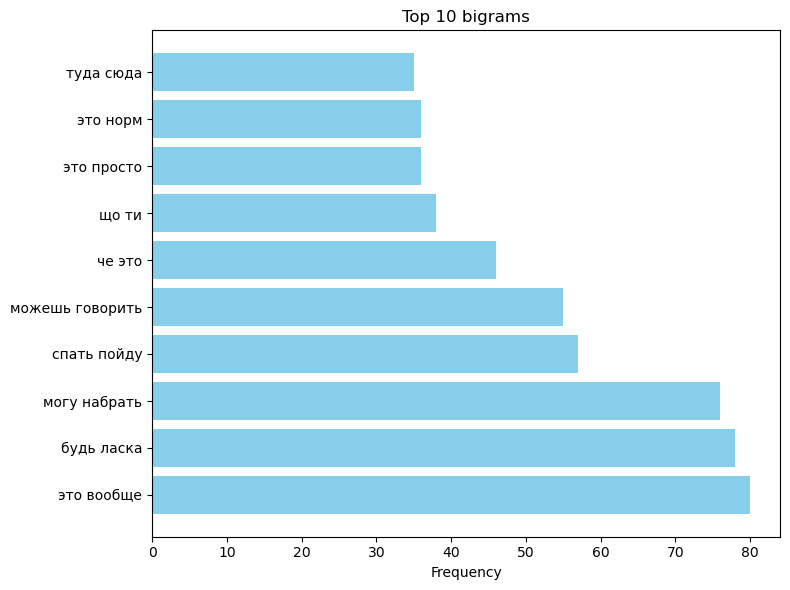

In [64]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

nltk.download('stopwords')

stop_words = stopwords.words('russian')

with open('stopwords.txt', 'r', encoding='utf-8') as f:
    custom_stop_words = [line.strip() for line in f.readlines()]

def filter_stopwords(text):
    return [word for word in text.split() if word not in custom_stop_words and word not in stop_words]

df_copy['message'] = df_copy['message'].fillna('').str.lower().apply(lambda x: re.sub(r'[^a-zа-яіїєґ\s]', '', x))

df_filtered = df_copy[df_copy['from_id'] == telegram_id]

bigrams = Counter()

for message in df_filtered['message']:
    words = filter_stopwords(message)
    bigrams.update(ngrams(words, 2))

bigrams_sorted = bigrams.most_common(10)

bigram_labels, bigram_counts = zip(*[(' '.join(bigram), count) for bigram, count in bigrams_sorted])

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.barh(bigram_labels, bigram_counts, color='skyblue')
ax1.set_title("Top 10 bigrams")
ax1.set_xlabel("Frequency")
plt.tight_layout()
plt.show()

#### 15. Show the number of messages with @ tags

In [66]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

df_filtered = df_copy[df_copy['from_id'] == telegram_id]

total_messages = len(df_filtered)
if total_messages == 0:
    print("No messages for this Telegram ID.")
else:
    def contains_tag(message):
        if isinstance(message, str):
            return bool(re.search(r'@\w+', message))
        return False

    tagged_messages = df_filtered['message'].apply(contains_tag)
    tagged_count = tagged_messages.sum()

    print(f"Number of messages with @ tags: {tagged_count}")

Number of messages with @ tags: 114


#### 16. Show the most common channels from which messages are forwarded

In [68]:
df_copy = df.copy()

df_copy = df_copy.dropna(subset=['fwd_from'])

df_copy['fwd_from'] = df_copy['fwd_from'].apply(lambda x: int(re.search(r'channel_id=(-?\d+)', str(x)).group(1)) if re.search(r'channel_id=(-?\d+)', str(x)) else None)

df_filtered = df_copy.dropna(subset=['fwd_from'])

channel_counts = Counter(df_filtered['fwd_from'])

most_common_channels = channel_counts.most_common(10)

for channel, count in most_common_channels:
    print(f"Channel ID: {channel}, Message count: {count}")

Channel ID: 2030509372.0, Message count: 788
Channel ID: 1320475121.0, Message count: 639
Channel ID: 1920735257.0, Message count: 338
Channel ID: 1578031860.0, Message count: 336
Channel ID: 2000911650.0, Message count: 240
Channel ID: 1181183917.0, Message count: 207
Channel ID: 1233777422.0, Message count: 130
Channel ID: 1258173254.0, Message count: 99
Channel ID: 1206439755.0, Message count: 69
Channel ID: 1409920010.0, Message count: 68


#### 17. Show messages that have questions 

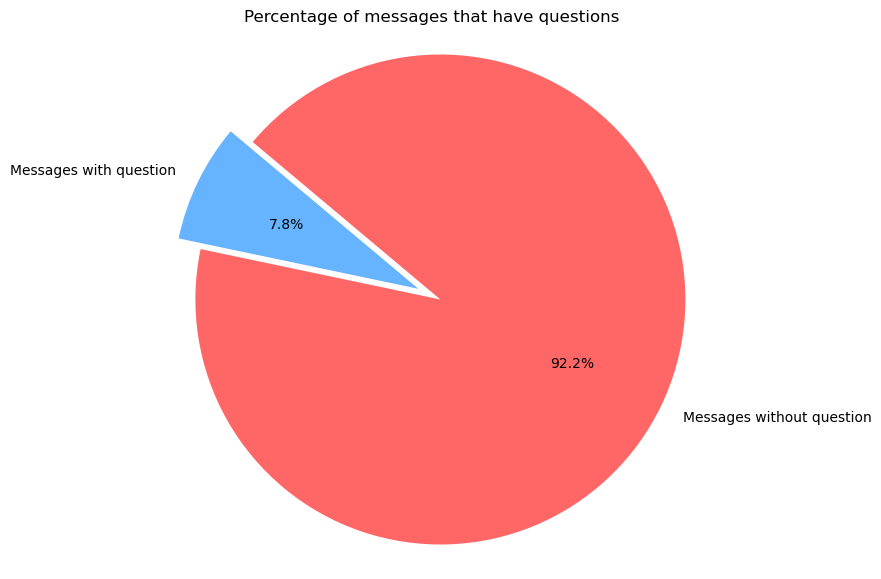

In [70]:
df_copy = df.copy()

messages_with_question = df[df['message'].apply(lambda x: isinstance(x, str) and '?' in x)]

count_messages_with_question = len(messages_with_question)

total_messages = len(df_copy)

labels = ['Messages with question', 'Messages without question']
sizes = [count_messages_with_question, total_messages - count_messages_with_question]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Percentage of messages that have questions')
plt.axis('equal')
plt.show()

#### 18. Show the correlation between message length and word count for each message

Correlation coefficient: 0.8662614467714683


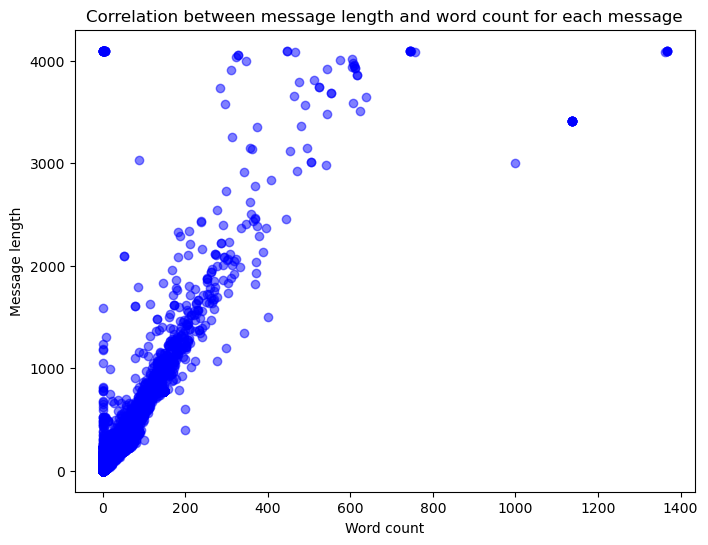

In [72]:
df_copy = df.copy()

df_copy = df_copy[df_copy['message'].notna()]

df_copy['message_length'] = df_copy['message'].str.len()

df_copy['word_count'] = df_copy['message'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

correlation = df_copy['message_length'].corr(df_copy['word_count'])

print(f'Correlation coefficient: {correlation}')

plt.figure(figsize=(8, 6))
plt.scatter(df_copy['word_count'], df_copy['message_length'], alpha=0.5, color='blue')
plt.title('Correlation between message length and word count for each message')
plt.xlabel('Word count')
plt.ylabel('Message length')
plt.show()

#### 19. Show messages distribution by weekend / weekday

Messages in weekend: 153725
Messages in weekdays: 466770


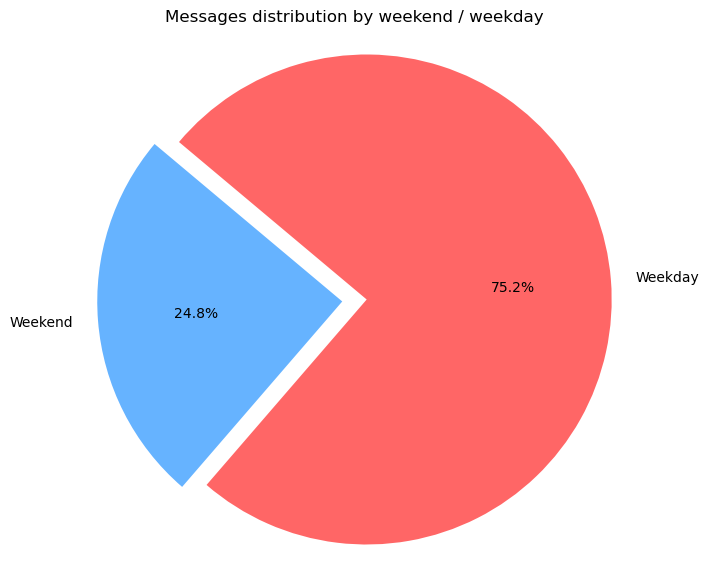

In [74]:
df_copy = df.copy()

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy['day_of_week'] = df_copy['date'].dt.dayofweek

df_copy['is_weekend'] = df_copy['day_of_week'].isin([5, 6])

messages_count = df_copy['is_weekend'].value_counts()

weekend_count = messages_count.get(True, 0)
weekday_count = messages_count.get(False, 0)

print(f'Messages in weekend: {weekend_count}')
print(f'Messages in weekdays: {weekday_count}')

labels = ['Weekend', 'Weekday']
sizes = [weekend_count, weekday_count]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Messages distribution by weekend / weekday')
plt.axis('equal')
plt.show()

#### 20. Show the correlation between number count and special symbol count ($ or ₴ or %)

Correlation between number count and special symbol ($ or %) count: 0.28144969353743765


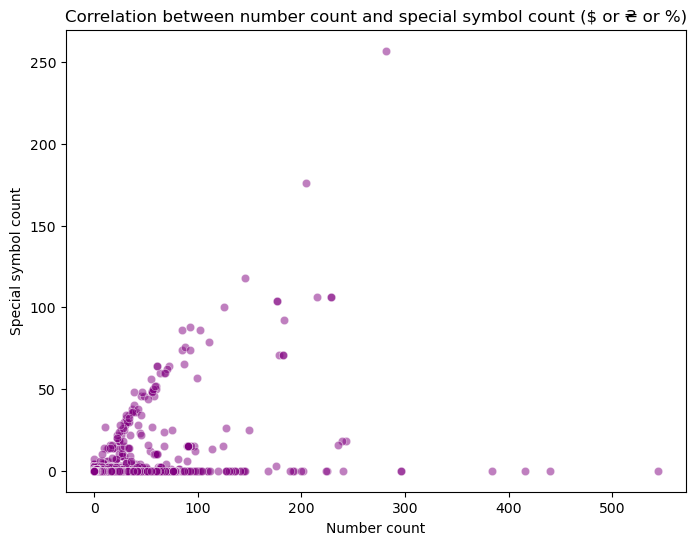

In [142]:
df_copy = df.copy()

df_copy['number_count'] = df_copy['message'].apply(lambda x: sum(char.isdigit() for char in x) if isinstance(x, str) else 0)

df_copy['special_symbol_count'] = df_copy['message'].apply(lambda x: sum(char in ['$', '%', '₴'] for char in x) if isinstance(x, str) else 0)

correlation = df_copy['number_count'].corr(df_copy['special_symbol_count'])

print(f'Correlation between number count and special symbol ($ or %) count: {correlation}')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_copy, x='number_count', y='special_symbol_count', alpha=0.5, color='purple')
plt.title('Сorrelation between number count and special symbol count ($ or ₴ or %)')
plt.xlabel('Number сount')
plt.ylabel('Special symbol count')
plt.show()